The Maximum Likelihood Estimation of a Normal distribution involves two parameters $(\mu, \sigma^2)$ which we will here by refer to as $(\theta_1, \theta_2)$. Since the likelihood function involves two parameters, to visualize it, a 3D graph is needed. In this section, we will generate a 3D graph, for viewers to interact with it and have a look around it. Since this interactivity is not possible in pdf, this material stays as html separately. 

This section is not about explaining the related concepts, they are covered in the theoretical part, from which you found this reference. This section only focusses on the formula we try to graph, and how do we generate the graph (in python). We will also do not deal with any further derivation of finding the maxima. We will just stop with graphing it. The vision  is, once this is possible, any one could use it as base, to illustrate many more complex 2D Likelihoods making it easier to understand the concepts. 

# MLE for Normal Distribution

Let $X_1, X_2, \cdots, X_m$ be a random sample from $N(\theta_1, \theta_2)$, where both the parameters belong to parameter space defined as 

$$
\Omega = \{ (\theta_1, \theta_2): -\infty < \theta_1 < \infty, 0 < \theta_2 < \infty \}
$$

Then by letting, $\theta_1 = \mu$ and $\theta_2 = \sigma^2$, we have the resultant likelihood function as 

\begin{aligned}
L(\theta_1, \theta_2) = \prod\limits_{i=1}^m\dfrac{1}{\sqrt{2\pi\theta_2}}\text{exp}\Big[ -\dfrac{(x_i - \theta_1)^2}{2\theta_2}\Big] \\
= \Big(\dfrac{1}{\sqrt{2\pi\theta_2}}\Big)^{m}\text{exp}\Big[ -\dfrac{  \sum_{i=1}^m(x_i - \theta_1)^2}{2\theta_2}\Big] \\
\end{aligned}

Taking natural log on both sides, 

$$
ln(L(\theta_1, \theta_2)) = - \dfrac{m}{2}\Bigg\{ln(2\pi\theta_2)\Bigg\} -  \dfrac{  \sum_{i=1}^m(x_i - \theta_1)^2}{2\theta_2}
$$

## Samples setup

Let us try to create an ideal sample from discrete binomial distribution whose mean and variance are known. For example, flipping a coin $n=4$ times could provide a sample set as below (all possible values are included to demonstrate the effect). Let us try for $n=4$ flips as below. 

In [1]:
x_i = [0,1,1,1,1,2,2,2,2,2,2,3,3,3,3,4]   # a binomial distribution normally approximated just for testing
# x_i = np.random.normal(2, 1.5, 100)
m = len(x_i)
mean = sum(x_i)/m
variance = sum([ (i-mean)**2 for i in x_i ])/m
print('mean:{}, variance:{}'.format(mean, variance))

mean:2.0, variance:1.0


## Graph setup

Plot.ly provides us the interactivity with the 3D graph so one could rotate and check the nature of the graph. 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from math import log, pi

# plotly offline init
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)   # this is needed for plot.ly to operate offline

## Handling data format

We will create 2 lists for $(\theta_1, \theta_2)$, and compute the $L$ function whose value we shall store both in a dataframe and also as a simple list (to be optimized later). Not at the moment, both $(\theta_1, \theta_2)$ should be of equal scale. 

In [3]:
t1 = np.arange(0,4,0.1)   # as we know in our experimental data, mean is 2 
t2 = np.arange(0.1,4,0.1)   # as we know in our experimental data, SD is 1

columns = ['t1', 't2', 'L']
df = pd.DataFrame(columns=columns)

Z = []
for each_t1 in t1:
    for each_t2 in t2:        
        s_1 = sum([ (i - each_t1)**2 for i in x_i ])
        L = - (m/2)*log(2*pi*each_t2) - s_1/(2*each_t2)
        df.loc[len(df)] = [each_t1, each_t2, L]
        Z.append(L)

Z = np.array(Z).reshape((len(t1),len(t2)))        
df.head()

,t1,t2,L
0,0.0,0.1,-396.282336
1,0.0,0.2,-201.827513
2,0.0,0.3,-138.404567
3,0.0,0.4,-107.372691
4,0.0,0.5,-89.157839


## Plotting the graph

We will feed the data and also setup the lay out including the view angle as desired. Note to facilitate rotation in angles, few additional functions had to be defined for cartesian to polar back to cartesian needed. 

In [4]:
from math import cos, sin, sqrt, atan2

def xyz2rtz(xyz):
    r = sqrt(xyz['x'] * xyz['x'] + xyz['y'] * xyz['y'])  # radius from origin
    t = atan2(xyz['x'], xyz['y'])                        # angle between (x,y) to origin and positive x axis
    z = xyz['z']                                         # vertical z axis
    return dict(r=r,t=r,z=r)
  
def rtz2xyz(rtz):  
    x = rtz['r'] * cos(rtz['t'])                         # rcos(theta)
    y = rtz['r'] * sin(rtz['t'])                         # rsin(theta)  
    z = rtz['z']                                         # z    
    return dict(x=x,y=y,z=z)
  
def rotate(eye0, angle, z):     
      rtz = xyz2rtz(eye0)
      rtz['t'] = rtz['t'] + angle
      rtz['z'] = z
      eye1 = rtz2xyz(rtz)
      return eye1
    
eye0=dict(x=2, y=0.88, z=1.25)
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=rotate(eye0,0.4, 0.6)
#     eye=dict(x=-2, y=1.3, z=0.9)
)

data = [
    go.Surface(
#         z=df.as_matrix()
        x = t1, y = t2, z = Z
    )
]
layout = go.Layout(
    title='MLE for Normal Distribution',
    scene=dict(camera=camera),
    autosize=False,
    width=600,
    height=600
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Finding maximum

Since we have the dataframe, it is easy to find the $(\theta_1,\theta_2)$ where, the likelihood attains maximum in above surface. 

In [5]:
df.loc[df['L'].idxmax()]

t1     2.000000
t2     1.000000
L    -22.703017
Name: 789, dtype: float64

Thus we get maximum (remember its log, so lower the absolute value of the negative, higher the actual value) of $L=-22$ at $(\theta_1 = 2, \theta_2 = 1)$ which of course as we would see in the theoretical section, turning out to be the mean and variance. 

## Matplotlib equivalent

It is of course also possible to plot using just matplotlib, but without the interactivity. Also surprisingly its more difficult to use matplotlib's method compared to plotly above. The green vertical line is approximately plotted to show the place where the surface has its maximum value. 

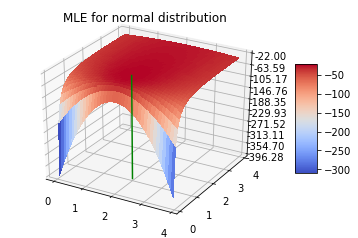

In [6]:
# 2D-arrays from DataFrame
x1 = np.linspace(df['t1'].min(), df['t1'].max(), len(df['t1'].unique()))
y1 = np.linspace(df['t2'].min(), df['t2'].max(), len(df['t2'].unique()))

"""
x, y via meshgrid for vectorized evaluation of
2 scalar/vector fields over 2-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.
"""

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
from scipy.interpolate import griddata
z2 = griddata((df['t1'], df['t2']), df['L'], (x2, y2), method='cubic')

# Ready to plot
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot( [2,2],[1,1],[-396,-22],color='green')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)




ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('MLE for normal distribution')
 
# ax.view_init(30, 225)  # rotate as needed
plt.show()